# Supporting files `utils.py`#
> Methods for setting axes, saving, exporting to files

In [6]:
import matplotlib.pyplot as plt
plt.style.use("ilya_plot")

import utils

# Curvature at the flat regions `curvature.py` #
> - Generates parameters for the curvature in different papers

In [1]:
import curvature

In [2]:
zhu2010 = curvature.extract_curve_from_image(
        "data/zhu2010.png", [20, 100], [20, 100], [100, 250], [-0.01, 0.01], [2, 8]
    )

In [3]:
stern2014 = curvature.extract_curve_from_image(
        "data/stern2014.png", [230, 260], [0, 2], [0, 30], [-0.003, 0.003], [8.4, 9]
    )

In [4]:
gustavsson2012 = curvature.extract_curve_from_image(
        "data/gustavsson2012.png",
        [60, 140],
        [60, 120],
        [160, 180],
        [-0.005, 0.005],
        [2, 4],
    )

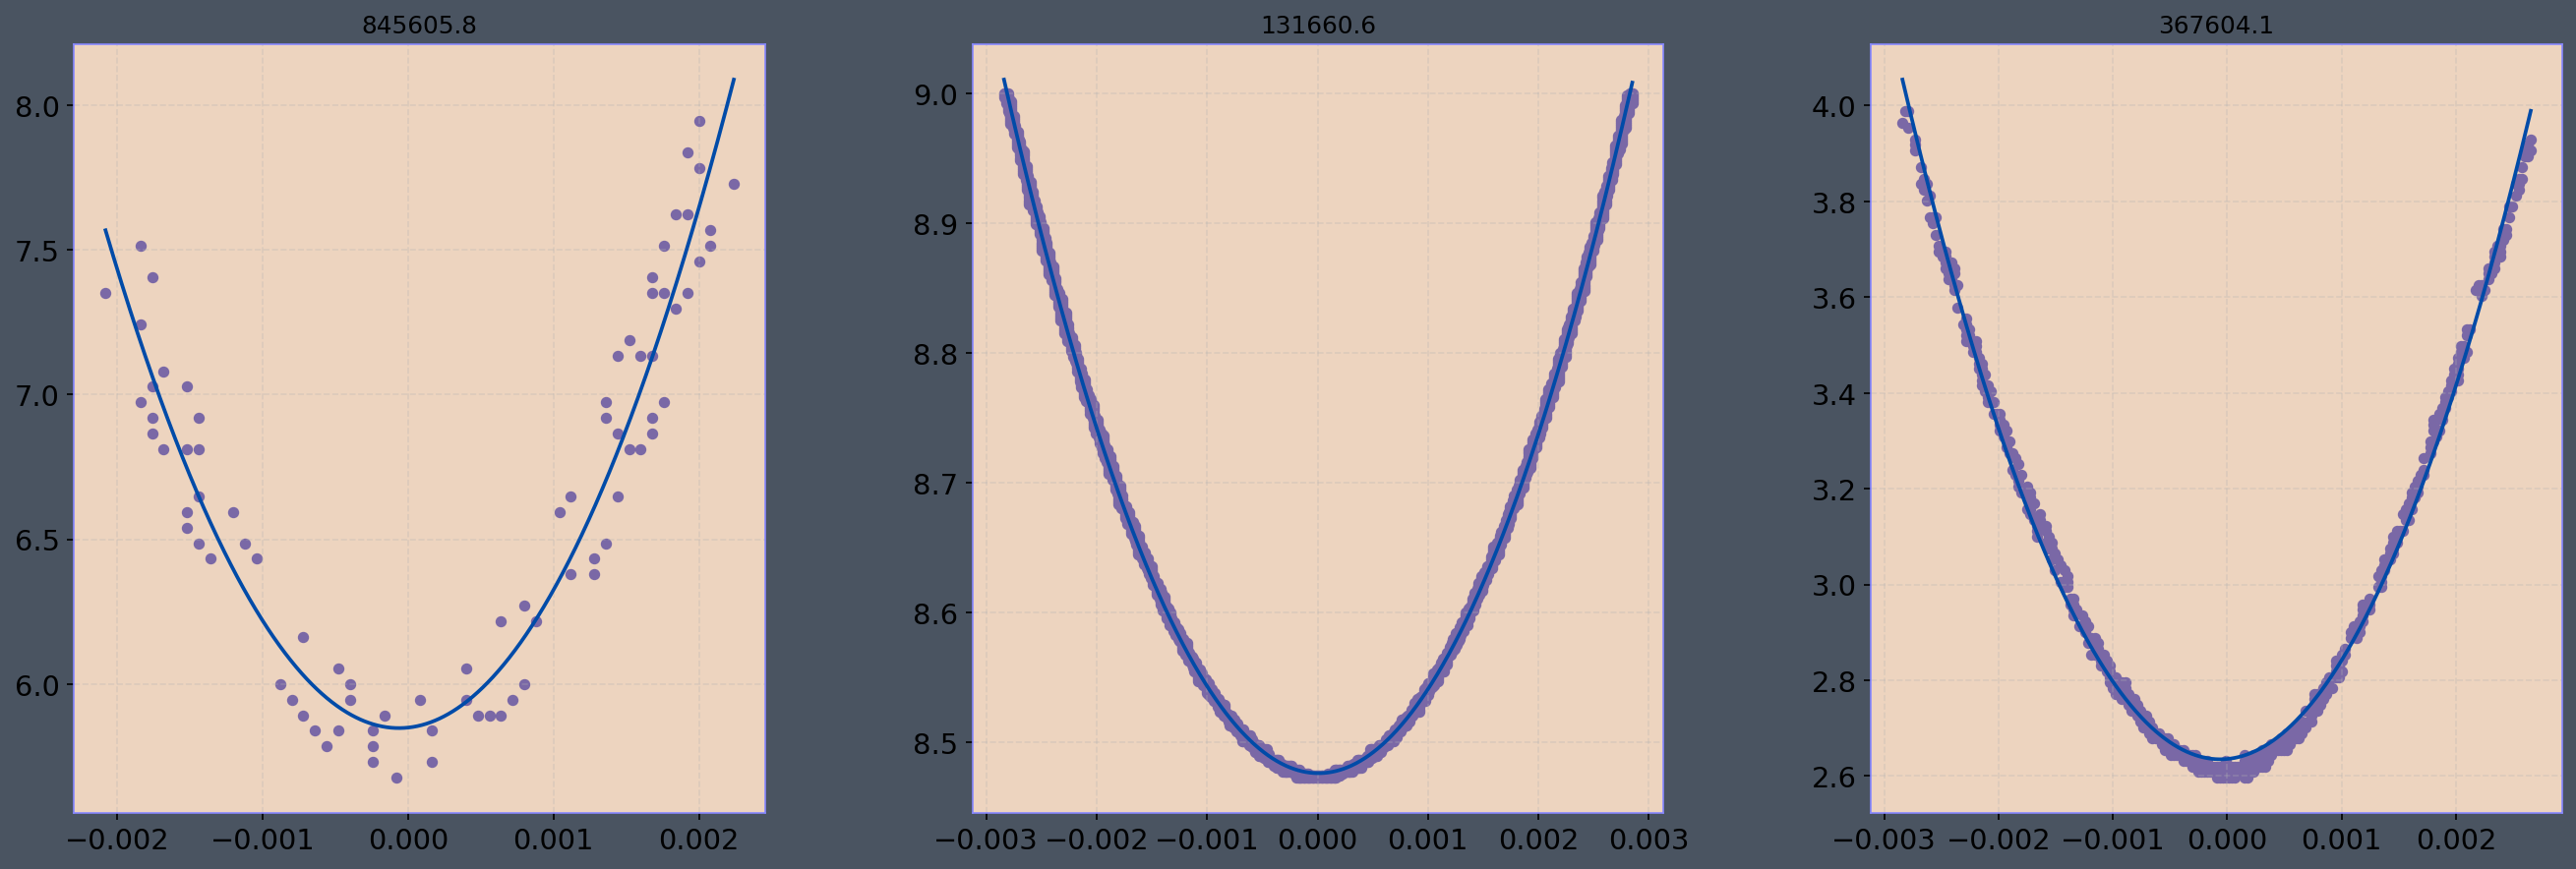

In [7]:
fig = plt.figure(figsize=(20, 7))
ax = fig.subplots(nrows=1, ncols=3)
curvature.fit_and_plot_parabolla(zhu2010, ax[0])
curvature.fit_and_plot_parabolla(stern2014, ax[1])
curvature.fit_and_plot_parabolla(gustavsson2012, ax[2])

# Rabi and Transmission plots `graph_analysis.py`#
> **Generates**
> - `fig2_transmission.svg`: fit to the transmission dip
> - `fig5_rabi.svg` oscillations

In [ ]:
import graph_analysis

# Fitting the spectrum
> Need to import the `TwinQubit` class

In [4]:
from quantum_builder import QuantumBuilder
import logging

qubit_parameters = {
    "alpha": 1.023,
    "assymetry": 1,
    "jj_squares": 2,
    "states_per_island": 3,
}
flux_list = np.linspace(-3, 3, 1000)

twin_qubit = QuantumBuilder.build_twin_qubit(qubit_parameters,
                                            flux_list,
                                            logging_level = logging.WARNING)
twin_qubit.override_parameters(
    EC = 13.5,
    EJ = 92
)
twin_qubit.run_simulation(False)

twin_qubit_state_manager:27:print_simulation_parameters
⮑  ⚙ Quantum state manager is using:
3     states per island
27    total states


twin_qubit_constant_manager:150:print_constants
⮑  ⚛ Constant Manager using parameters:
EC:                           13.5
EJ:                           92
alpha:                        1.023
assymetry:                    1
jj_critical_current:          3.1172453105244715e-08
jj_resistance:                9200.0
jj_capacitance:               4.071e-15
capacitance_matrix:           
[[ 2.    -1.     0.   ]
 [-1.     3.023 -1.   ]
 [ 0.    -1.     2.   ]]

twin_qubit_hamiltonian_manager:144:print_skeleton_information
⮑  🏗 Skeleton Hamiltonian Information
charge              row  27     col  27     elm  27     
phi1                row  36     col  36     elm  36     
phi2                row  36     col  36     elm  36     
phi3                row  36     col  36     elm  36     
+phi21              row  12     col  12     elm  12     
-phi21            

In [ ]:
import matplotlib.pyplot as plt

fig, mpl_axes = 

In [ ]:
class old:
    states_total_number = 7**3
    def convert_index_to_island_state(self, index):
            """
            __ Parameters __
            index: number convert (0 <= index < states_total_number)

            __ Description __
            Takes an index and converts it to a unique cooper pair distribution
            across the 3 islands of the system - (n1, n2, n3).

            __ Changes __
            state_numerical_distribution:
                an ARRAY of the 3-island state
            state_cp_distribution:
                a MATRIX of the 3-island states, so that central index has a charge
                distribution (0,0,0)
            """

            # 0 - error checking
            if (index < 0) or (index >= self.states_total_number):
                raise ValueError("Index {index} must be within 0 and {self.states_total_number} -> converting to 0")

            # 1 - evaluate the offset to apply, to get centering about (0,0,0)
            minimal_number_of_cp_on_island = (1 - self.states_total_number) / 2

            # 2 - represent 'index' by a trinary and cooper pair distribution
            self.state_numerical_distribution = []
            self.state_cp_distribution = []
            workingNumber = index

            # 3 - decomposition of a number to self.states_total_number base-system
            for island in [2, 1, 0]:

                # a - get the cp representation on this island
                island_no_cp = int(workingNumber / (self.states_total_number ** island))

                # b - store numerical and cp values
                self.state_numerical_distribution.append(island_no_cp)
                self.state_cp_distribution.append(
                    island_no_cp + minimal_number_of_cp_on_island
                )

                # c - decrease the working number
                workingNumber = (
                    workingNumber - island_no_cp * (self.states_total_number) ** island
                )

            # 4 - convert to numpy arrays
            print(np.array(self.state_numerical_distribution))
            print(np.matrix(self.state_cp_distribution))

In [ ]:
class new:
    states_per_island = 7
    cp_offset_to_apply = 3
    def convert_index_to_system_state(self, index, set_class_variable=False):
        """
        __ Parameters __
        [int] index:                    to convert into a one-to-one system state
                                        (0 <= index < states_total_number)

        [bool] set_class_variable:      set class variables to evaluate values?

        __ Description __
        Takes an index and converts it to a unique cooper pair distribution
        across the 3 islands of the system - (n1, n2, n3).

        __ Returns __
        [int, int, int] state_indx:           3-island index distribution
        [int, int, int] state_cp:              3-island cp distribution, centered about (0,0,0)
        """

        # 0 - error checking
        # if((index < 0) or (index >= self.states_total_number)):
        #     print("Index %data_set must be within 0 and %data_set -> converting to 0" %
        #           (index, self.states_total_number))
        #     index = 0

        # 1 - convert index to  represetnation on the 3 islands
        state_indx = np.zeros(3, dtype=int)

        for idx_i, i in enumerate(np.base_repr(index, base=self.states_per_island)[::-1]):
            state_indx[idx_i] = int(i)

        # 2 - generate cp distribution, centered around (0, 0, 0)
        state_cp = state_indx - self.cp_offset_to_apply

        # 3 - set class variables if required
        print(state_indx)
        print(state_cp)

In [ ]:
alpha = 1
delta = 0.03
_capacitance = np.matrix(
            [[2, -1, 0], [-1, 2 + alpha + delta, -1], [0, -1, 2]]
        )
capacitance = np.array(_capacitance)
capacitance_inverse = np.array(_capacitance.I)

In [ ]:
np.dot(capacitance,capacitance_inverse)

In [ ]:
def convert_system_state_to_index(state_indx) -> int:
        """
        __ Parameters __
        [int, int, int] state_indx:      array of the index distribution

        __ Description __
        convert systems state to a unique indexa

        __ Return __
        [int] unique index identifying the system
        """

        return int("".join(map(str, state_indx)), base=7)

In [ ]:
convert_system_state_to_index([0,1,6])

In [ ]:
_new = new()
_new.convert_index_to_system_state(10)

_old = old()
_old.convert_index_to_island_state(10)

In [ ]:
qubit_parameters = {
    "EC": 13.5,
    "EJ": 92,
    "alpha": 1.023,
    "assymetry": 1,
    "states_per_island": 7,
}
flux_list = np.linspace(-3, 3, 1000)

working_instance = TwinQubit(qubit_parameters,
                             flux_list,
                             plot_or_not = True, 
                             logging_level = logging.WARNING)

In [ ]:
TwinQubit?

# Simulating the spectrum
Spectrum is simulated with

In [ ]:
import qubit_twin
import honkler
import matplotlib.pyplot as plt

In [ ]:
honkler.config_plot_size(0.2, 0.9, 0.15, 0.9)

In [ ]:
EC = 13.5
EJ = 92
alpha = 1.023
assymetry = 1.011
test = qubit_twin.twin(alpha, assymetry, 7, 5000, True, False)
test.experimental_data_load(test.ax, False)
test.prepare_operators()
test.override_parameters(EC, EJ, alpha, assymetry)
test.simulate([True, False])

In [ ]:
# Figure 2 narrow range

In [ ]:
test.plot_simulation(test.ax)
plt.show()